In [1]:
import pandas as pd
import numpy as np
from analysis import * 

From the bad profolios, how do we pick the good applicants? 
- Capital one. 
- Compare the feature importance on the subset and the whole data set, and see if they are different. The real question here is how to pick the fearures that are important. 
- Make it logical.
- Compare the credit type in each type 
- if they are the same variable 

# Import and merge the data 

Many people stuggle to get loan due to bad credit history. Usually, when people have past dues on the related loans, they fail to get fund from lenders. However, not all of them will end up defaulting on the new loan. 
For this project, we focus on this type of group of people. We want to see what features play an important part in determining if they will default on the new loan, given the cirrumstances that they already have past dues on similar old loans. 

In [2]:
bureau_data = pd.read_csv('bureau.csv')
application_data = pd.read_csv('application_train.csv')
previous_application_data = pd.read_csv('previous_application.csv')
credit_balance_data = pd.read_csv('credit_card_balance.csv')
install_payment_data = pd.read_csv('installments_payments.csv')
POS_CASH_balance_data = pd.read_csv('POS_CASH_balance.csv')

In [3]:
## merge the data 
## DONT DO IT NOW!!! 
##df = pd.merge(bureau_data,application_data,on = 'SK_ID_CURR',how = 'outer')
##df = pd.merge(df,previous_application_data,on = 'SK_ID_CURR',how = 'outer')
##df = pd.merge(df,credit_balance_data,on = 'SK_ID_CURR',how = 'outer')
##df = pd.merge(df,install_payment_data,on = 'SK_ID_CURR',how = 'outer')
##df = pd.merge(df,POS_CASH_balance_data,on = 'SK_ID_CURR',how = 'outer')

In [4]:
bureau_application = pd.merge(bureau_data,application_data,on = 'SK_ID_CURR',how = 'inner')

In [5]:
bureau_application.shape

(1465325, 138)

# Explore the bureau_application data

We have 4217 records with past dues, 3864 unqiue applicants in total. 
- 54 features need to be cut off becuase of the large amount of missing values. (> 24%) 
- We kept 84 features , among them, 73 of them do not have any missing values

In [32]:
## Get summay on application data
summary = getDfSummary(bureau_application[(bureau_application.CREDIT_DAY_OVERDUE !=0) & (bureau_application.TARGET==0)])
summary.to_csv('summary.csv')

### function to plot the distribution on the fearures

In [ ]:
### data processing 
def data_processing(data):
    ## credit_active 
    columns = ['SK_ID_CURR']
    credit_active_data = data['CREDIT_ACTIVE']
    credit_active_data_dummy = pd.get_dummies(credit_active_data)
    credit_active_data_dummy_columns = credit_active_data_dummy.columns
    data = pd.concat([data,credit_active_data_dummy],1)
    columns.extend(credit_active_data_dummy_columns)
    
    
    
    
    
    

In [37]:
data =bureau_application
credit_active_data = data['CREDIT_ACTIVE']
credit_active_data_dummy = pd.get_dummies(credit_active_data)
data = pd.concat([data,credit_active_data_dummy],1)

In [42]:
credit_active_data_dummy_columns = credit_active_data_dummy.columns
columns = ['SK_ID_CURR']
columns.extend(credit_active_data_dummy_columns)
columns

['SK_ID_CURR', 'Active', 'Bad debt', 'Closed', 'Sold']

In [8]:
previous_application_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
bureau_application[(bureau_application.CREDIT_DAY_OVERDUE !=0)]

0.009290724559446654

In [35]:
len(np.unique(application_data.SK_ID_CURR))

307511

/Users/xiao/miniconda3/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/Users/xiao/miniconda3/envs/py3/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


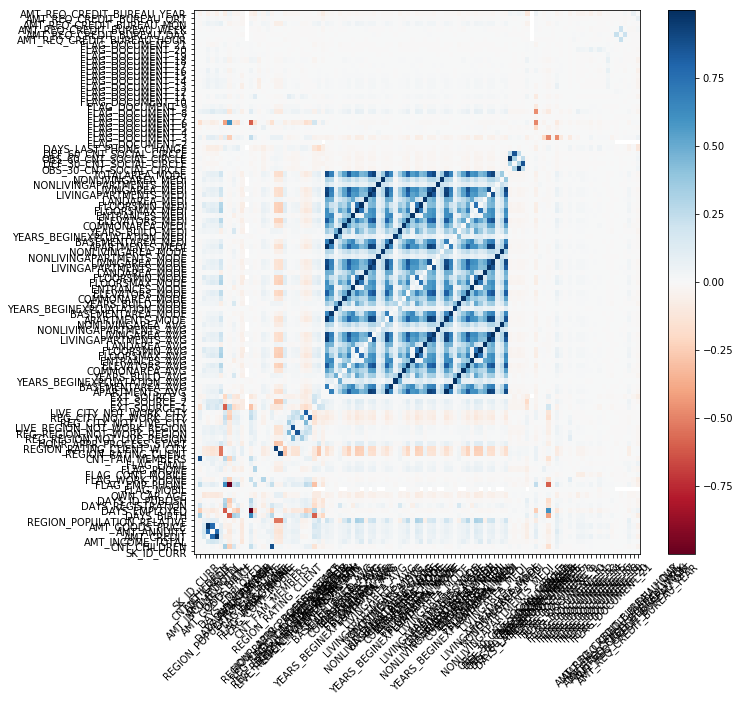

In [31]:
% matplotlib inline
plotCorr(application_data, 'TARGET', 10, 10)

In [29]:
def plotCorr(dat, lab, h, w):
    '''
    Do a heatmap to visualize the correlation matrix, dropping the label
    '''

    dat = dat.drop(lab, 1)
    #Get correlation and 0 out the diagonal (for plotting purposes)
    c_dat = dat.corr()
    for i in range(c_dat.shape[0]):
        c_dat.iloc[i,i] = 0

    c_mat = c_dat.as_matrix()
    #c_mat = c_mat[:-1, :-1]
    fig, ax = plt.subplots()
    heatmap = plt.pcolor(c_mat, cmap = plt.cm.RdBu)

    #Set the tick labels and center them
    ax.set_xticks(np.arange(c_dat.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(c_dat.shape[1]) + 0.5, minor = False)
    ax.set_xticklabels(c_dat.index.values, minor = False, rotation = 45)
    ax.set_yticklabels(c_dat.index.values, minor = False)
    heatmap.axes.set_ylim(0, len(c_dat.index))  
    heatmap.axes.set_xlim(0, len(c_dat.index)) 
    plt.colorbar(heatmap, ax = ax)

    #plt.figure(figsize = (h, w))
    fig = plt.gcf()
    fig.set_size_inches(h, w)
    fig.show()

In [15]:
def getDfSummary(dat):
	'''
	Get descriptive stats
	'''
	#Get the names of the columns
	cols = dat.columns.values

	c_summ = []
	#Outer Loop for the cols
	for c in cols:
		#Count the NAs
		missing = sum(pd.isnull(dat[c]))
		#Use describe to get summary statistics, and also drop the 'count' row
		sumval = dat[c].describe().drop(['count'])
		#Now count distinct values...note that nunique removes missing values for you
		distinct = dat[c].nunique()
		#Append missing and distinct to sumval
		sumval = sumval.append(pd.Series([missing, distinct], index=['missing', 'distinct']))
		#Add each sumval to a list and then convert the entire thing to a DS
		c_summ.append(sumval)

	return pd.DataFrame(c_summ, index=cols)

In [4]:
'''
This script has a set of reference functions for performing analysis of the churn dataset
'''
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.metrics as skm
import os

cwd = os.getcwd()
sys.path.append('/'.join(cwd.split('/')[0:-1]) + '/utils')

from ClassifierBakeoff import *

import warnings
warnings.filterwarnings('ignore')

def getDfSummary(dat):
	'''
	Get descriptive stats
	'''
	#Get the names of the columns
	cols = dat.columns.values

	c_summ = []
	#Outer Loop for the cols
	for c in cols:
		#Count the NAs
		missing = sum(pd.isnull(dat[c]))
		#Use describe to get summary statistics, and also drop the 'count' row
		sumval = dat[c].describe().drop(['count'])
		#Now count distinct values...note that nunique removes missing values for you
		distinct = dat[c].nunique()
		#Append missing and distinct to sumval
		sumval = sumval.append(pd.Series([missing, distinct], index=['missing', 'distinct']))
		#Add each sumval to a list and then convert the entire thing to a DS
		c_summ.append(sumval)

	return pd.DataFrame(c_summ, index=cols)





def plotCorr(dat, lab, h, w):
	'''
	Do a heatmap to visualize the correlation matrix, dropping the label
	'''

	dat = dat.drop(lab, 1)
	#Get correlation and 0 out the diagonal (for plotting purposes)
	c_dat = dat.corr()
	for i in range(c_dat.shape[0]):
		c_dat.iloc[i,i] = 0

	c_mat = c_dat.as_matrix()
	#c_mat = c_mat[:-1, :-1]
	fig, ax = plt.subplots()
	heatmap = plt.pcolor(c_mat, cmap = plt.cm.RdBu)
 
	#Set the tick labels and center them
	ax.set_xticks(np.arange(c_dat.shape[0]) + 0.5, minor = False)
	ax.set_yticks(np.arange(c_dat.shape[1]) + 0.5, minor = False)
	ax.set_xticklabels(c_dat.index.values, minor = False, rotation = 45)
	ax.set_yticklabels(c_dat.index.values, minor = False)
	heatmap.axes.set_ylim(0, len(c_dat.index))  
	heatmap.axes.set_xlim(0, len(c_dat.index)) 
	plt.colorbar(heatmap, ax = ax)

	#plt.figure(figsize = (h, w))
	fig = plt.gcf()
	fig.set_size_inches(h, w)


def makeBar(df, h, lab,  width):
	'''
	Contains
	'''
	df_s = df.sort(columns = [h], ascending = False)

	#Get a barplot
	ind = np.arange(df_s.shape[0])
	labs = df_s[[lab]].values.ravel() 

	fig = plt.figure(facecolor = 'w', figsize = (12, 6))
	ax = plt.subplot(111)
	plt.subplots_adjust(bottom = 0.25)

	rec = ax.bar(ind + width, df_s[[h]].values, width, color='r')

	ax.set_xticks(ind + getTickAdj(labs, width))
	ax.set_xticklabels(labs, rotation = 45, size = 14)


def getTickAdj(labs, width):
	lens = list(map(len, labs))
	lens = -1 * width * (lens - np.mean(lens)) / np.max(lens)
	return lens

def plotMI(dat, lab, width = 0.35, signed = 0):
	'''
	Draw a bar chart of the normalized MI between each X and Y
	'''
	X = dat.drop(lab, 1)
	Y = dat[[lab]].values
	cols = X.columns.values
	mis = []

	#Start by getting MI
	for c in cols:
		mis.append(skm.normalized_mutual_info_score(Y.ravel(), X[[c]].values.ravel()))

	#Get signs by correlation
	corrs = dat.corr()[lab]
	corrs[corrs.index != lab]
	df = pd.DataFrame(list(zip(mis, cols)), columns = ['MI', 'Lab'])
	df = pd.concat([df, pd.DataFrame(list(corrs), columns = ['corr'])], axis=1, join_axes=[df.index])


	
	if signed == 0:
		makeBar(df, 'MI', 'Lab', width)

	else:
		makeBarSigned(df, 'MI', 'Lab', width)


def makeBarSigned(df, h, lab,  width):
	'''
	Contains
	'''
	df_s = df.sort(columns = [h], ascending = False)

	#Get a barplot
	ind = np.arange(df_s.shape[0])
	labs = df_s[[lab]].values.ravel()
	h_pos = (df_s[['corr']].values.ravel() > 0) * df_s.MI
	h_neg = (df_s[['corr']].values.ravel() < 0) * df_s.MI

	fig = plt.figure(facecolor = 'w', figsize = (12, 6))
	ax = plt.subplot(111)
	plt.subplots_adjust(bottom = 0.25)

	rec = ax.bar(ind + width, h_pos, width, color='r', label = 'Positive')
	rec = ax.bar(ind + width, h_neg, width, color='b', label = 'Negative')

	ax.set_xticks(ind + getTickAdj(labs, width))
	ax.set_xticklabels(labs, rotation = 45, size = 14)

	plt.legend()



def makeGS_Tup(ent, getmin = True):

	ostr = dToString(ent.parameters, ':', '|')
	if len(ostr.split('|')) > 2:
		sp = ostr.split('|')
		if len(sp) == 3:
			ostr = '{}|{}\n{}'.format(sp[0], sp[1], sp[2])
		else:
			ostr = '{}|{}\n{}|{}'.format(sp[0], sp[1], sp[2], sp[3])
		
	#ostr = dToString(ent.parameters, ':', '|')
	mu = np.abs(ent.mean_validation_score) #Log-Loss comes in at negative value
	sig = ent.cv_validation_scores.std()
	stderr = sig/np.sqrt(len(ent.cv_validation_scores))
						 
	if getmin:
		return (mu, ostr, mu + stderr, sig, stderr) #Note, this assumes minimization, thus adding stderr
	else:
		return (mu, ostr, mu - stderr, sig, stderr)
		
	
def rankGS_Params(gs_obj_list, getmin = True):
	'''
	Takes in the .grid_scores_ attributes of a GridSearchCV object
	'''
	tup_list = []
	
	for k in gs_obj_list:
		tup_list.append(makeGS_Tup(k, getmin))
	
	tup_list.sort()

	if not getmin:
		tup_list.reverse()

	return tup_list



def processGsObjList(gs_obj_list, getmin = True):

	rank_list = rankGS_Params(gs_obj_list, getmin)
	hts = []
	desc = []
	errs = []
	std1 = rank_list[0][4]

	for tup in rank_list:
		hts.append(tup[0])
		desc.append(tup[1])
		errs.append(2 * tup[4])

	return [hts, desc, errs, std1]

def plotGridSearchSingle(gs_obj_list, getmin = True):

	hts, desc, errs, std1 = processGsObjList(gs_obj_list, getmin = True)

	gridBarH(hts, desc, errs, std1)



def plotGridSearchMulti(tup_list, getmin = True):
	'''
	Loop through a list of gs_obj_lists. The Obj list is in the 1 slot of each value in the dict
	'''
	m_ht = []
	m_desc = []
	m_errs = []

	best_min = 1000 #This assumes we are minimizing

	for tup in tup_list:
		lab = tup[0]
		gs_dict = tup[1]

		for k in gs_dict:
			clf = type(k).__name__.split('Classifier')[0]

			hts, desc, errs, std1 = processGsObjList(gs_dict[k][1], getmin = True)
			for i, d in enumerate(desc):
				desc[i] = '{} {} {}'.format(clf, lab, d)

			if hts[0] < best_min:
				best_std1 = std1
	
			m_ht = m_ht + hts
			m_desc = m_desc + desc
			m_errs = m_errs + errs

	gridBarH(m_ht, m_desc, m_errs, best_std1, int(len(m_ht)), 12)



def gridBarH(hts, desc, errs, std1, h = 6, w = 12):

	fig = plt.figure(facecolor = 'w', figsize = (w, h))
	ax = plt.subplot(111)
	plt.subplots_adjust(bottom = 0.25)

	width = 0.5
	
	pos = np.arange(len(hts))

	rec = ax.barh(pos, np.array(hts), width, yerr = np.array(errs), color='r')

	ax.set_yticks(pos + width/2)
	ax.set_yticklabels(desc, size = 14)

	tmp = list(hts)
	tmp.sort()

	x_min = np.array(hts).min() - 2*np.array(hts).std()
	x_max = tmp[-2] + 2*np.array(hts).std()
	plt.xlim(x_min, x_max)


	plt.plot(tmp[0] * np.ones(len(tmp)), pos)
	plt.plot((tmp[0] + std1) * np.ones(len(tmp)), pos)


ImportError: No module named 'ClassifierBakeoff'